In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score,r2_score,f1_score

In [59]:
# Using the pandas Excel class to raed the excel file load the excel file
data_set = pd.ExcelFile('Brownfield_Data.xlsx')
sheet = 0  # Sheet counter

#Seperating the sheets and saving them as CSV file
try:
    brownfield_data = pd.read_csv("Brownfield_Real_Data.csv")
    brownfield_data
except:
    print("File does not exist yet..")
    print(f'Reading {data_set.sheet_names[sheet]} to a DataFrame....')
    for sheet_name in data_set.sheet_names:
        if sheet <= len(data_set.sheet_names):
            df = pd.read_excel(data_set, sheet_name)
            if sheet == 0:
                name = 'Brownfield_Real_Data.csv'
                df.to_csv(name)
                print()
                print(
                    f'Saved {data_set.sheet_names[sheet]} as a CSV file with the name {name}')
            else:
                pass
            sheet += 1

File does not exist yet..
Reading Sheet1 to a DataFrame....

Saved Sheet1 as a CSV file with the name Brownfield_Real_Data.csv


In [60]:
#Selecting the feature and target dataset
X = brownfield_data[["Time(days)","Water Rate(STB/day)","Water Cut fraction"]]
Y = brownfield_data["Oil Rate (STB/day)"]

In [61]:
# Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

#Create the Random Forest model and fitting the data
classifier  = RandomForestRegressor(n_estimators=11,random_state=0)
classifier.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=11, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [62]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([194.52727273, 298.21818182, 273.02727273, 284.57272727,
       576.58181818, 194.52727273, 298.21818182])

In [63]:
#Calculating and printing the model accuracy
print(f'The accurancy score is:{explained_variance_score(Y_test, Y_pred)*100}%')
print(f'The R2 accurancy score is:{r2_score(Y_test, Y_pred)*100}%')

The accurancy score is:99.29686757408055%
The R2 accurancy score is:99.28309977732752%


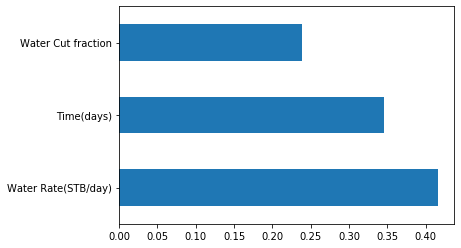

In [64]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [65]:
#Reselecting the feature and target dataset in order to predict condition
X1 = brownfield_data[["Time(days)","Water Rate(STB/day)","Water Cut fraction"]]
Y1 = brownfield_data["Oil Rate (STB/day)"]

# Split dataset into train and test set
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1,test_size=0.30,random_state=0)

condition = pd.DataFrame(X_test1)
condition["Actual Oil Rate (STB/day)"]  = Y_test1
condition["Predicted Oil Rate (STB/day)"] = Y_pred
condition

,Time(days),Water Rate(STB/day),Water Cut fraction,Actual Oil Rate (STB/day),Predicted Oil Rate (STB/day)
20,3635,814.8,0.815,185.2,194.527273
10,1835,711.2,0.711,288.8,298.218182
14,1895,716.2,0.716,283.8,273.027273
13,1880,714.9,0.715,285.1,284.572727
1,95,405.8,0.406,594.2,576.581818
21,3650,815.4,0.815,184.6,194.527273
11,1850,712.5,0.712,287.5,298.218182


In [66]:
# Predicting condition for oil production
Y_pred_avg = Y_pred.max()-Y_pred.min()
condition.loc[condition["Predicted Oil Rate (STB/day)"] < Y_pred.mean(), "Condition"] = "Not economical to produce"
condition.loc[condition["Predicted Oil Rate (STB/day)"] >= Y_pred.mean(), "Condition"] = "Less economical to produce"
condition.loc[condition["Predicted Oil Rate (STB/day)"] >= Y_pred_avg, "Condition"] = "Highly economical to produce" 
condition

,Time(days),Water Rate(STB/day),Water Cut fraction,Actual Oil Rate (STB/day),Predicted Oil Rate (STB/day),Condition
20,3635,814.8,0.815,185.2,194.527273,Not economical to produce
10,1835,711.2,0.711,288.8,298.218182,Not economical to produce
14,1895,716.2,0.716,283.8,273.027273,Not economical to produce
13,1880,714.9,0.715,285.1,284.572727,Not economical to produce
1,95,405.8,0.406,594.2,576.581818,Highly economical to produce
21,3650,815.4,0.815,184.6,194.527273,Not economical to produce
11,1850,712.5,0.712,287.5,298.218182,Not economical to produce
